# Make Clsuters based on featuees Age and Income

# Import Libraries

In [11]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
cd C:\Mehul Session\Session 27_Python Introduction\LMS FT\LMS Python\1_Python_Session_File\5_Machine Learning\9_kmean\K means Clustering Session

C:\Mehul Session\Session 27_Python Introduction\LMS FT\LMS Python\1_Python_Session_File\5_Machine Learning\9_kmean\K means Clustering Session


In [13]:
df = pd.read_excel("K_Means_Clustring_Dataset.xlsx")
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [5]:
df.shape

(22, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
Age          22 non-null int64
Income($)    22 non-null int64
dtypes: int64(2)
memory usage: 432.0 bytes


# plot a histplot to show data distrubation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002045061CDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002045072E630>]], dtype=object)

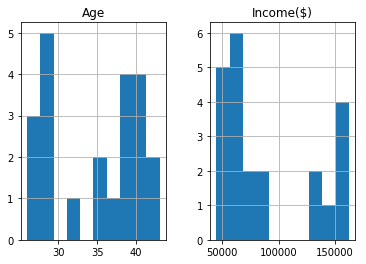

In [14]:
df.hist()

In [8]:
df.isnull().sum()

Age          0
Income($)    0
dtype: int64

Text(0,0.5,'Income($)')

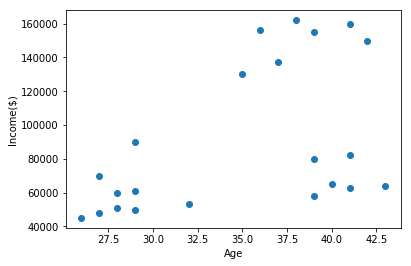

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

# Intilization of  Model

# Only give mesure features in model

# Select N cluster as 3

n_clusters : int, default=8 The number of clusters to form as well as the number of centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape (n_clusters, n_features), default='k-means++' Method for initialization, defaults to 'k-means++':
'k-means++' : selects initial cluster centers for k-mean
clustering in a smart way to speed up convergence. See section
Notes in k_init for more details.

'random': choose k observations (rows) at random from data for
the initial centroids.

If an ndarray is passed, it should be of shape (n_clusters, n_features)
and gives the initial centers.


n_init : int, default=10 Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : int, default=300 Maximum number of iterations of the k-means algorithm for a single run.

tol : float, default=1e-4 Relative tolerance with regards to inertia to declare convergence.

precompute_distances : 'auto' or bool, default='auto' Precompute distances (faster but takes more memory).
'auto' : do not precompute distances if n_samples * n_clusters > 12
million. This corresponds to about 100MB overhead per job using
double precision.

True : always precompute distances.

False : never precompute distances.


verbose : int, default=0 Verbosity mode.

random_state : int, RandomState instance, default=None Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See :term:Glossary <random_state>.

copy_x : bool, default=True When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified, ensuring X is C-contiguous. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean, in this case it will also not ensure that data is C-contiguous which may cause a significant slowdown.

n_jobs : int, default=None The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.
``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
``-1`` means using all processors. See :term:`Glossary <n_jobs>`
for more details.


algorithm : {"auto", "full", "elkan"}, default="auto" K-means algorithm to use. The classical EM-style algorithm is "full". The "elkan" variation is more efficient by using the triangle inequality, but currently doesn't support sparse data. "auto" chooses "elkan" for dense data and "full" for sparse data.


In [15]:
km = KMeans(n_clusters=3,)
km.fit(df)

KMeans(n_clusters=3)

In [16]:

y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [17]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,27,70000,1
1,29,90000,1
2,29,61000,2
3,28,60000,2
4,42,150000,0


In [18]:
df['cluster']=y_predicted
df.head

<bound method NDFrame.head of     Age  Income($)  cluster
0    27      70000        1
1    29      90000        1
2    29      61000        2
3    28      60000        2
4    42     150000        0
5    39     155000        0
6    41     160000        0
7    38     162000        0
8    36     156000        0
9    35     130000        0
10   37     137000        0
11   26      45000        2
12   27      48000        2
13   28      51000        2
14   29      49500        2
15   32      53000        2
16   40      65000        2
17   41      63000        2
18   43      64000        2
19   39      80000        1
20   41      82000        1
21   39      58000        2>

In [19]:
km.cluster_centers_

array([[  3.82857143e+01,   1.50000000e+05],
       [  3.40000000e+01,   8.05000000e+04],
       [  3.29090909e+01,   5.61363636e+04]])

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plot a cluser data with centroid

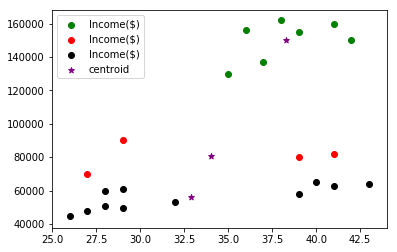

In [21]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# silhouette_score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


In [22]:
from sklearn.metrics import silhouette_score

In [23]:
score = silhouette_score(df, y_predicted)
score

0.65556509395502394

# We can say that the clusters are well apart from each other as the silhouette score is closer to 1

# Herirchical Clustering

In [17]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


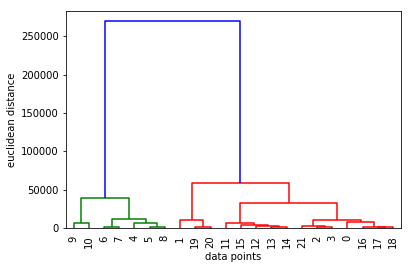

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df)

In [22]:
df["label"] = cluster

In [23]:
df.head()

,Age,Income($),label
0,27,70000,1
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


In [24]:
df.label.value_counts()


1    12
0     7
2     3
Name: label, dtype: int64

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
score_agg = silhouette_score(df, cluster)
score_agg

0.68174585768312046